In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [85]:
df = pd.read_csv(r"C:\Users\pedro\OneDrive\Desktop\LMA\Ciencia de Datos\ClasificaciónBinaria\loan_data.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [87]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [88]:
ncl0 = len(df[df['not.fully.paid'] == 0])
ncl1 = len(df[df['not.fully.paid'] == 1])

print(ncl0, 'proporción -> ', ncl0/len(df['not.fully.paid']))
print(ncl1, 'proporción -> ', ncl1/len(df['not.fully.paid']))

8045 proporción ->  0.8399457089162664
1533 proporción ->  0.16005429108373356


In [89]:
ndf = pd.get_dummies(df, prefix='purpose', prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=int)

In [90]:
X = ndf.drop('not.fully.paid', axis=1)
y = df['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)


In [91]:
len(np.array(y_train))
X_train.shape

(6417, 19)

In [92]:
train1 = np.array([X_train.iloc[i] for i in range(len(y_train)) if y_train[i] == 0])
train2 = np.array([X_train.iloc[i] for i in range(len(y_train)) if y_train[i] == 1])

mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)

sigma1 = np.cov(train1, rowvar=False)
sigma2 = np.cov(train2, rowvar=False)

print('Media y varianza muestral de la categoria 1:')
print(f'Media : {mean1}')
print('Varianza :')
print(sigma1)
print('----------------------------------------------')
print('Media y varianza muestral de la categoria 2:')
print(f'Media : {mean2}')
print('Varianza :')
print(sigma2)
print('----------------------------------------------')

fraction_train1 = len(train1)/len(y_train)
fraction_train2 = len(train2)/len(y_train)

print(f'Fracción muestral de la categoria 1 : {fraction_train1}')
print(f'Fracción muestral de la categoria 2 : {fraction_train2}')

Media y varianza muestral de la categoria 1:
Media : [8.34317343e-01 1.20491827e-01 3.13660410e+02 1.09502368e+01
 1.24126402e+01 7.13466790e+02 4.60503674e+03 1.63748397e+04
 4.56458358e+01 1.41955720e+00 1.69003690e-01 5.20295203e-02
 2.45940959e-01 1.42804428e-01 4.09963100e-01 3.33948339e-02
 6.53136531e-02 4.59409594e-02 5.66420664e-02]
Varianza :
[[ 1.38257423e-01 -2.68504147e-03  5.32704149e+00  6.66755908e-03
  -2.13011456e-01  4.57227849e+00  8.40870148e+01 -2.29086418e+03
  -9.89293127e-01 -3.86831083e-01 -1.77587537e-02 -4.66460431e-03
  -4.45562252e-03  9.66668460e-04  2.42606818e-03 -2.03200574e-03
   1.59654189e-03  1.89241217e-03 -3.94062439e-04]
 [-2.68504147e-03  7.27370265e-04  1.55180896e+00  7.20336173e-04
   4.17492432e-02 -7.54140713e-01 -9.70689528e+00  8.50572808e+01
   3.80854465e-01  1.03839613e-02  2.56798060e-03  5.66046301e-04
  -1.31640613e-03 -4.55983348e-04  1.92261697e-03 -1.33367892e-04
  -3.98561839e-04 -4.36199449e-04  8.17901687e-04]
 [ 5.32704149e+

d

In [93]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [94]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8206263840556786
F1 Score: 0.8686606980013266


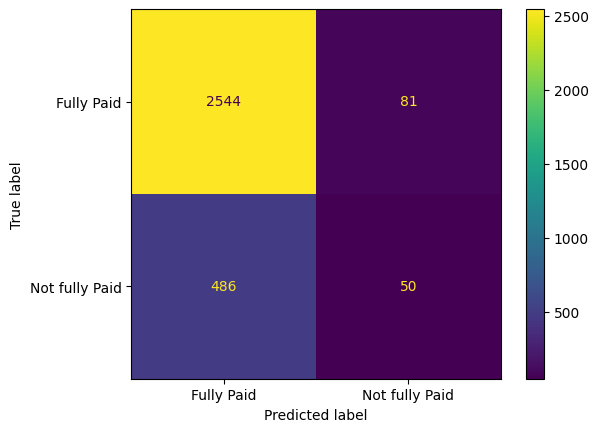

In [95]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()